In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from markov import simulate_model, solve_model

%matplotlib inline

In [3]:
def validate_array(a) -> bool:
    sum_vec = np.sum(a, axis=1)
    ones_vec = np.full(a.shape[0], 1)
    return np.isclose(sum_vec, ones_vec).all()

In [4]:
matrix = np.array([
    [0.0, 0.2, 0.2, 0.0, 0.3, 0.1, 0.2, 0.0],
    [0.0, 0.1, 0.0, 0.2, 0.2, 0.5, 0.0, 0.0],
    [0.4, 0.1, 0.1, 0.0, 0.0, 0.3, 0.0, 0.1],
    [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
    [0.6, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.0, 0.5, 0.2, 0.0, 0.0, 0.3],
])

# Check valid probabilities sum
assert validate_array(matrix)

matrix.shape

(8, 8)

In [5]:
initial_states_count = 10

rnd = np.random.RandomState(42)
initial_states = np.array([rnd.rand(8) for i in range(0, initial_states_count)])

for state in initial_states:
    state /= state.sum()

assert validate_array(initial_states)

In [6]:
def run_model_simulation(matrix, initial_state) -> np.ndarray:
    final_state, history = simulate_model(matrix=matrix, initial_state=initial_state)
    iterations_count = len(history)
    
    plt.title("Stddev history")
    plt.ylabel("Stddev")
    plt.xlabel("Step (time)")
    
    x = range(1, iterations_count + 1)
    y = history
    plt.plot(x, y)
    
    return final_state

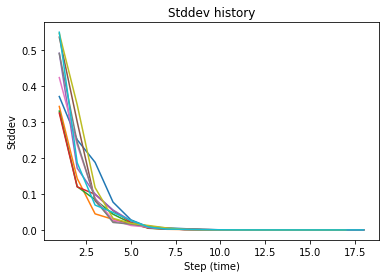

In [7]:
final_states = []
for state in initial_states:
    final_state = run_model_simulation(matrix, state)
    final_states.append(final_state)

In [8]:
from itertools import combinations

for pair in combinations(final_states, 2):
    stddev = la.norm(pair[0] - pair[1])
    print("Stddev between final vectors: {}".format(stddev))

Stddev between final vectors: 3.753940877586468e-07
Stddev between final vectors: 2.593273650321345e-07
Stddev between final vectors: 5.109448439889294e-07
Stddev between final vectors: 3.8798266376468073e-07
Stddev between final vectors: 3.03929210507275e-07
Stddev between final vectors: 1.0278293720977545e-07
Stddev between final vectors: 1.0989319947354325e-06
Stddev between final vectors: 7.940508759229133e-07
Stddev between final vectors: 3.1984572338611546e-07
Stddev between final vectors: 4.929404838649754e-07
Stddev between final vectors: 6.842473091484521e-07
Stddev between final vectors: 6.118150688925053e-07
Stddev between final vectors: 1.8519267527672423e-07
Stddev between final vectors: 3.0196583163286545e-07
Stddev between final vectors: 1.1332489700141255e-06
Stddev between final vectors: 8.499057200895839e-07
Stddev between final vectors: 5.856151670259465e-07
Stddev between final vectors: 2.6014020300633707e-07
Stddev between final vectors: 1.3664278721495532e-07
Stdd

In [9]:
final_state = solve_model(matrix=matrix)
final_state.shape

(8,)

In [10]:
norm = la.norm(final_state - final_states[0])
print("Stddev between final vectors: {}".format(norm))

Stddev between final vectors: 5.313931242462366e-07
